In [1]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pylab as pl
import pandas as pd

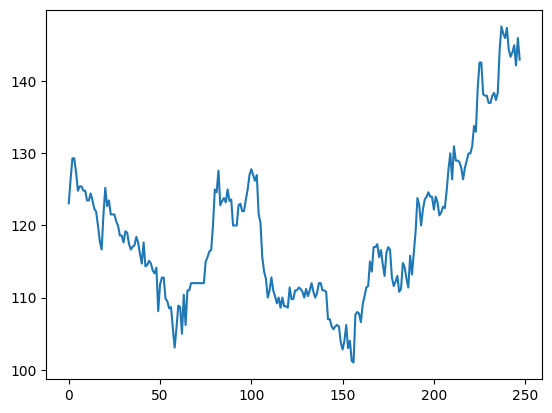

In [2]:
# Downloading the data
data = pd.read_csv("test.csv")


# unpack quotes
dates = np.array([d for d in data.iloc[:, 0]], str)
close_v = np.array([d for d in data.iloc[:, 1]])
volume = np.array([d for d in data.iloc[:, 2]])

# take diff of close value
# this makes len(diff) = len(close_t) - 1
# therefore, others quantity also need to be shifted
diff = close_v[1:] - close_v[:-1]
dates = dates[1:]
close_v = close_v[1:]
volume = volume[1:]

# pack diff and volume for training
X = np.column_stack([close_v, diff])
pl.plot(X[:, 0])

In [3]:
from hmmlearn.hmm import GaussianHMM

###############################################################################
# Run Gaussian HMM
print(
    "fitting to HMM and decoding ...",
)
n_components = 3  # three state model

# make an HMM instance and execute fit
model = GaussianHMM(n_components, covariance_type="diag", n_iter=1000)

model.fit(X)  # fit using Baum Welch

# predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)
hidden_states
# print ("done\n")

fitting to HMM and decoding ...


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

Transition matrix
[[9.84418184e-01 1.55818162e-02 6.37570482e-35]
 [2.16947719e-02 9.67513842e-01 1.07913856e-02]
 [4.74066460e-31 2.32693094e-15 1.00000000e+00]]

means and vars of each hidden state
0th hidden state
mean =  [ 1.11210345e+02 -4.23396452e-02]
var =  [14.64779139  3.96627301]

1th hidden state
mean =  [123.78172695   0.12736954]
var =  [11.16598907  3.94570725]

2th hidden state
mean =  [141.07269834   0.46440761]
var =  [18.09884867  6.32839193]



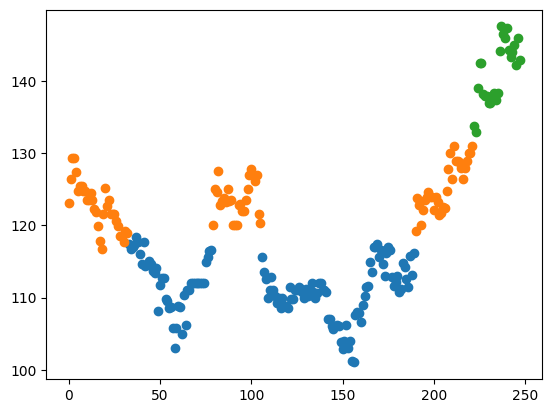

In [4]:
###############################################################################
# print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
print("")

print("means and vars of each hidden state")
for i in range(n_components):
    print("%dth hidden state" % i)
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print("")


positions = np.arange(len(dates))
for i in range(n_components):
    # use fancy indexing to plot data in each state
    idx = hidden_states == i
    # print(positions[idx],close_v[idx])
    pl.plot(positions[idx], close_v[idx], "o", label="%dth hidden state" % i)